###

Starting with an overview of the material outcomes, which summarize averages, medians, variances, and so forth, it becomes evident that for our focal drug, Capomulin, both the standard deviation(StD) and the SEM are notably smaller compared to most others; in fact, only one surpasses it in this regard. Coupled with the observation that the mean tumor volume falls below the initial 45 mm³, it suggests that employment of Capomulin typically results in tumor size reduction among most subjects. However, it's crucial to address significant caveats. Firstly, as we're amalgamating results across all time points without regard to a time series, the linearity of tumor reduction remains uncertain. Additionally, there's no assurance that all mice were consistently monitored at every timepoint; it's conceivable that while some mice who exhibited tumor shrinkage initially might have been absent in later observations; this potential absence of information is neither beneficial nor adverse to the overall data, but necessary to note.
Furthermore, it's plausible that tumors initially decreased in size only to rebound later, but not above their original size. The tables' limitations are compounded when considering other drugs. The data hints at a multitude of possible scenarios yet fails to offer conclusive insights.

The inclusion of frequency bar charts does provide some improvement. Our previous critique regarding the aggregation of timepoints remains valid, as does the potential fluctuation in tumor size. However, upon examining both the initial tables and the bar charts, we observe that a competitor drug, Ramicane, consistently exhibits smaller standard deviations and SEMs in tumor size. While our previous critiques remain pertinent, it's crucial to acknowledge that Capomulin is not the sole effective treatment option.

The inclusion of a sex pie chart allows us to address certain uncertainties regarding gender distribution. Nevertheless, this distribution is fixed, and we cannot infer gender equality from this data alone.

Our box plot chart offers further insight into our evaluation of Capomulin and its competitor, Ramicane. With Infubinol and Ceftamin appearing less frequently and displaying tumor sizes surpassing the initial 45 mm³, it's evident that these drugs are not as effective in tumor treatment. In contrast, both Capomulin and Ramicane exhibit distributions suggesting a greater propensity for tumor size reduction. Notably, Ramicane's distribution indicates a higher likelihood of tumor size reduction in the lower half compared to Capomulin.

The individual chart of mouse L509 and its Capomulin regimen is informative; we see that the tumor continues to grow in size from the beginning of the study until the 20th day. Upon then, the tumor decreases in size and is smaller than the initial 45 mm³ by the end of the study. However, in two periods after this reduction begins we see a regrow in the size of the tumors. The second period is likely more important; after the 35th day and until the end of the study, the tumor constantly regains its size. While it is a single mouse, this could be hinting at the diminished effects of t

The last two charts aid in understanding the relationship between weight and tumor size. With a correlation coefficient of .842, there appears to be a significant association between the two variables. However, concerns regarding time factors and size distribution persist. While the initial weight does appear to influence tumor size, further details cannot be conclusively inferred.he drugs.

###



In [1]:
%matplotlib widget

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress

In [3]:
mouse_metadata_raw = Path("data/Mouse_metadata.csv")
mouse_metadata = pd.read_csv(mouse_metadata_raw)
study_results_raw = Path("data/Study_results.csv")
study_results = pd.read_csv(study_results_raw)
print(mouse_metadata)
print(study_results)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0       k403     Ramicane    Male          21          16
1       s185    Capomulin  Female           3          17
2       x401    Capomulin  Female          16          15
3       m601    Capomulin    Male          22          17
4       g791     Ramicane    Male          11          16
..       ...          ...     ...         ...         ...
244     z314     Stelasyn  Female          21          28
245     z435     Propriva  Female          12          26
246     z581    Infubinol  Female          24          25
247     z795     Naftisol  Female          13          29
248     z969     Naftisol    Male           9          30

[249 rows x 5 columns]
     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0        b128          0           45.000000                 0
1        f932          0           45.000000                 0
2        g107          0           45.000000                 0
3        a457          0    

In [4]:
data_merge = pd.merge(mouse_metadata, study_results, on="Mouse ID", how ="right")
clear_data = data_merge[data_merge["Mouse ID"] != "g989"]
clear_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,f932,Ketapril,Male,15,29,0,45.000000,0
2,g107,Ketapril,Female,2,29,0,45.000000,0
3,a457,Ketapril,Female,11,30,0,45.000000,0
4,c819,Ketapril,Male,21,25,0,45.000000,0
...,...,...,...,...,...,...,...,...
1888,r944,Capomulin,Male,12,25,45,41.581521,2
1889,u364,Capomulin,Male,18,17,45,31.023923,3
1890,p438,Ceftamin,Female,11,26,45,61.433892,1
1891,x773,Placebo,Female,21,30,45,58.634971,4


In [5]:
unique_drugs = clear_data["Drug Regimen"].unique()
drug_name_df = pd.DataFrame(unique_drugs, columns=["Drug Regimen"])
drug_name_df.set_index("Drug Regimen", inplace=True)

drug_name_df["Mean Tumor Volume"] = round(clear_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean(), 4)
drug_name_df["Median Tumor Volume"] = round(clear_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median(), 4)
drug_name_df["Tumor Volume Variance"] = round(clear_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var(), 4)
drug_name_df["Tumor Volume Std. Dev."] = round(clear_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std(), 4)
drug_name_df["Tumor Volume Std. Err."] = round(clear_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem(), 4)

drug_name_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.6757,41.5578,24.9478,4.9948,0.3293
Ketapril,55.2356,53.6987,68.5536,8.2797,0.6039
Naftisol,54.3316,52.5093,66.1735,8.1347,0.5965
Infubinol,52.8848,51.8206,43.1287,6.5672,0.4922
Stelasyn,54.2331,52.4317,59.4506,7.7104,0.5731
Ramicane,40.2167,40.6732,23.4867,4.8463,0.3210
Zoniferol,53.2365,51.8185,48.5334,6.9666,0.5164
Propriva,52.3209,50.4463,43.8520,6.6221,0.5443
Placebo,54.0336,52.2889,61.1681,7.8210,0.5813


In [6]:

grouped = clear_data.groupby('Drug Regimen')
summ_stats = grouped['Tumor Volume (mm3)'].agg(
    mean='mean',
    median='median',
    variance='var',
    std_dev='std'
)
summ_stats['SEM'] = grouped['Tumor Volume (mm3)'].apply(sem)
summ_stats = summ_stats.round(4)

summ_stats


,mean,median,variance,std_dev,SEM
Drug Regimen,,,,,
Capomulin,40.6757,41.5578,24.9478,4.9948,0.3293
Ceftamin,52.5912,51.7762,39.2902,6.2682,0.4698
Infubinol,52.8848,51.8206,43.1287,6.5672,0.4922
Ketapril,55.2356,53.6987,68.5536,8.2797,0.6039
Naftisol,54.3316,52.5093,66.1735,8.1347,0.5965
Placebo,54.0336,52.2889,61.1681,7.8210,0.5813
Propriva,52.3209,50.4463,43.8520,6.6221,0.5443
Ramicane,40.2167,40.6732,23.4867,4.8463,0.3210
Stelasyn,54.2331,52.4317,59.4506,7.7104,0.5731


In [7]:
panda_bar_name = clear_data.groupby("Drug Regimen")
panda_bar_count = panda_bar_name["Drug Regimen"].count()
sort_panda_bar_count = panda_bar_count.sort_values(ascending=False)
sort_panda_bar_count

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Drug Regimen, dtype: int64

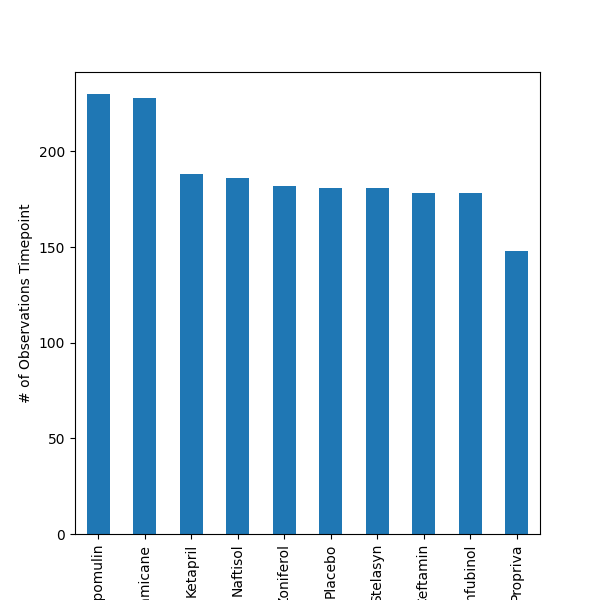

In [8]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
plt.figure() 
panda_bar = sort_panda_bar_count.plot(kind ='bar', figsize= (6,6))
panda_bar.set_xlabel("Drug Regimen")
panda_bar.set_ylabel("# of Observations Timepoint")
plt.show()
plt.tight_layout()

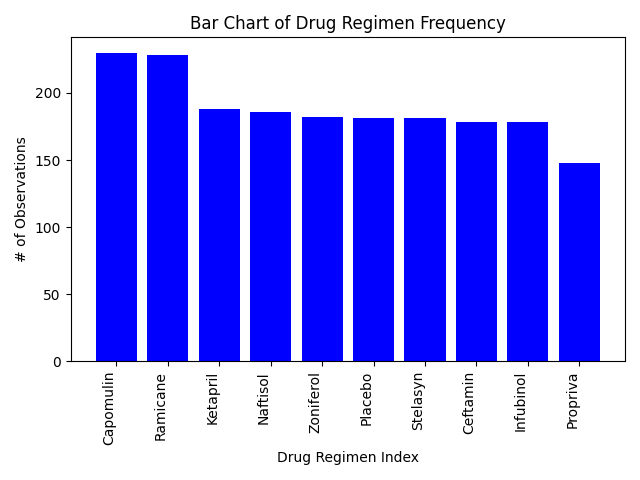

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
py_bar = clear_data.groupby("Drug Regimen").size()
py_bar = py_bar.sort_values(ascending=False)
py_bar_x = np.arange(len(py_bar))

plt.figure()  
plt.bar(py_bar_x, py_bar, color="b", align="center")
plt.xticks(py_bar_x, py_bar.index, rotation=90, ha="right")
plt.xlabel("Drug Regimen Index")
plt.ylabel("# of Observations")
plt.title("Bar Chart of Drug Regimen Frequency")
plt.tight_layout()  

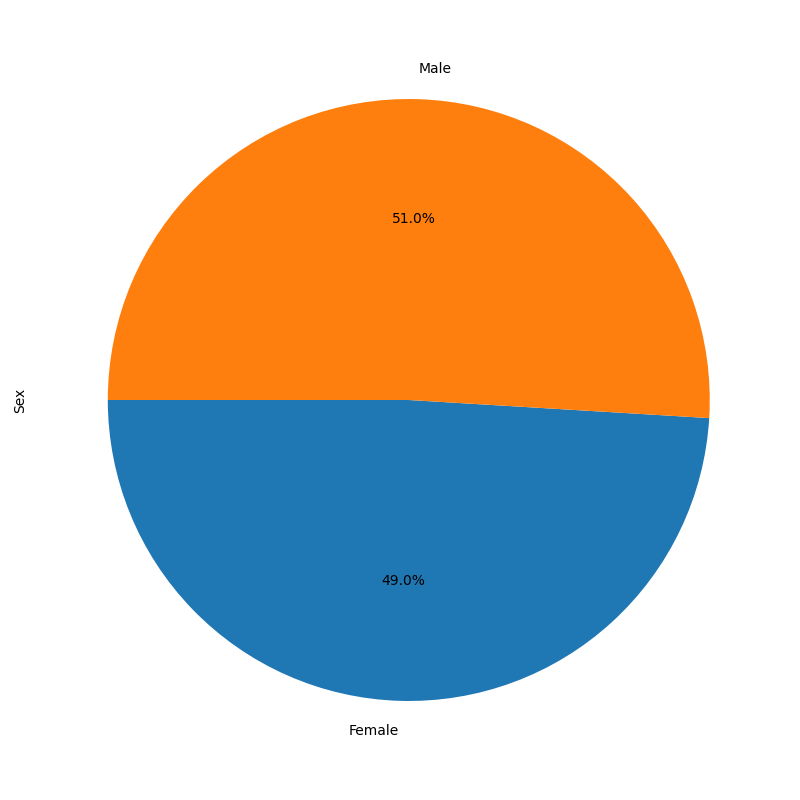

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
panda_pie_name = clear_data.groupby("Sex")
panda_pie_count = panda_pie_name["Sex"].count()

plt.figure(figsize=(8, 8)) 
panda_pie_count.plot(kind='pie', autopct='%1.1f%%', startangle=180, legend=False)
plt.ylabel('Sex') 
plt.tight_layout()  
plt.show()

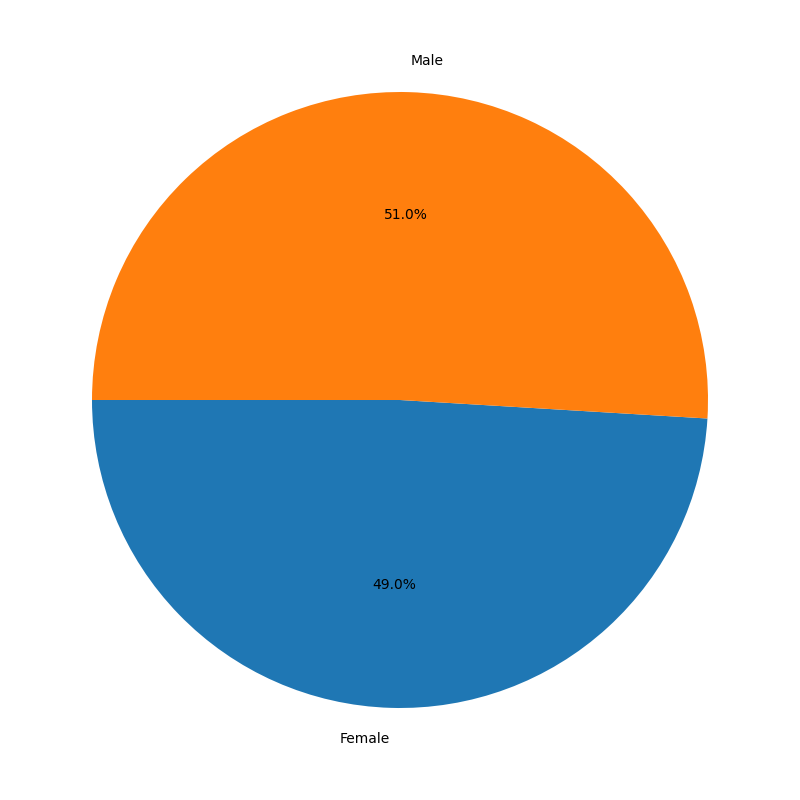

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplotpy_pie = clear_data.groupby("Sex").size()
py_pie = clear_data.groupby("Sex").size()
plt.figure(figsize=(8, 8))
plt.pie(py_pie, labels=py_pie.index, autopct='%1.1f%%', startangle=180)
plt.tight_layout()

plt.show()


In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
target_drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
box_plot_data = clear_data[clear_data["Drug Regimen"].isin(target_drugs)]
box_plot_data_count = box_plot_data.sort_values(by=["Drug Regimen", "Timepoint"], ascending=[True, False])

max_timepoints = {}
for index, row in box_plot_data_count.iterrows():
    mouse_id = row["Mouse ID"]
    timepoint = row["Timepoint"]
    if mouse_id not in max_timepoints or timepoint > max_timepoints[mouse_id]["Timepoint"]:
        max_timepoints[mouse_id] = row
max_timepoints_df = pd.DataFrame(max_timepoints.values())


In [13]:
tumor_vol_data = {}

tumor_volumes = {}
# Extract tumor volumes for each drug
for drug in target_drugs:
    # Filter data for the given drug
    drug_data = max_timepoints_df[max_timepoints_df["Drug Regimen"] == drug]
    tumor_volumes[drug] = drug_data["Tumor Volume (mm3)"]

# Function to compute IQR and find outliers
def find_outliers(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

for drug, volumes in tumor_volumes.items():
    outliers = find_outliers(volumes)
    print(f"{drug}'s potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 420    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


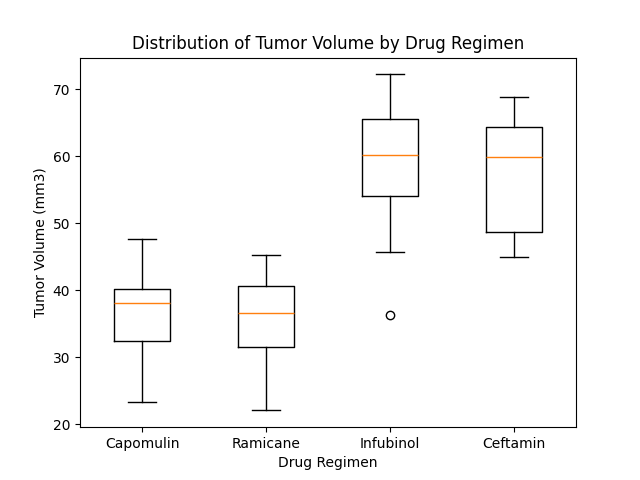

In [19]:

box_plot_data = [tumor_volumes[drug] for drug in target_drugs]

fig, ax = plt.subplots()
ax.boxplot(box_plot_data, labels=target_drugs)
ax.set_title("Distribution of Tumor Volume by Drug Regimen")
ax.set_xlabel("Drug Regimen")
ax.set_ylabel("Tumor Volume (mm3)")


plt.show()

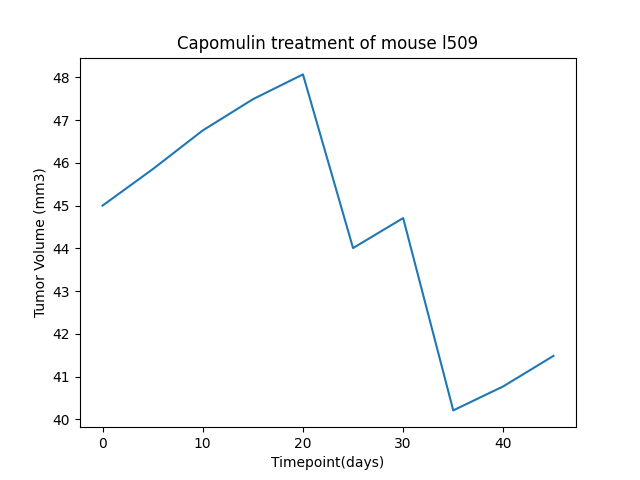

In [15]:
capomulin_i = clear_data[clear_data["Mouse ID"]=="l509"]

plt.figure()  


plt.plot(capomulin_i["Timepoint"], capomulin_i["Tumor Volume (mm3)"])
plt.xlabel("Timepoint(days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")
plt.show()

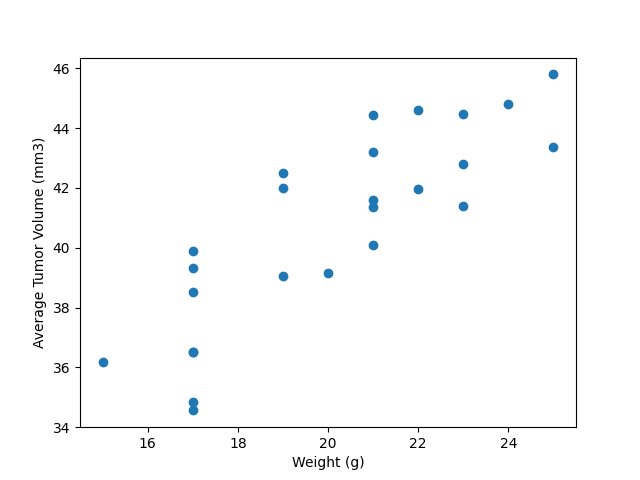

In [16]:
capomulin_all = clear_data[clear_data["Drug Regimen"]=="Capomulin"]
plt.figure()  
ave_tumor = round(capomulin_all.groupby("Mouse ID")["Tumor Volume (mm3)"].mean(), 4)
ave_weight = round(capomulin_all.groupby("Mouse ID")["Weight (g)"].mean(), 4)
plt.scatter(ave_weight, ave_tumor)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

The correlation between mouse weight and the average tumor volume is: 0.8420


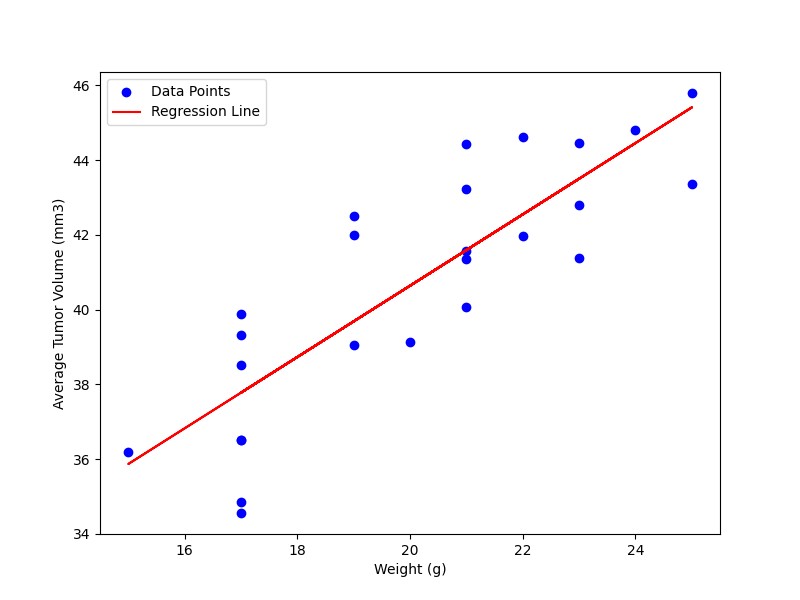

In [18]:
capomulin_all = clear_data[clear_data["Drug Regimen"]=="Capomulin"]


ave_tumor = round(capomulin_all.groupby("Mouse ID")["Tumor Volume (mm3)"].mean(), 4)
ave_weight = round(capomulin_all.groupby("Mouse ID")["Weight (g)"].mean(), 4)


slope, intercept, r_value, p_value, std_err = linregress(ave_weight, ave_tumor)
regression_line = slope * ave_weight + intercept


plt.figure(figsize=(8, 6))
plt.scatter(ave_weight, ave_tumor, color='blue', label='Data Points')
plt.plot(ave_weight, regression_line, color='red', label='Regression Line')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.legend()
corr_coefficient = round(np.corrcoef(ave_weight, ave_tumor)[0, 1], 3)
print(f"The correlation between mouse weight and the average tumor volume is: {corr_coefficient:.4f}")
plt.show()

